Data

https://www.kaggle.com/code/valchovalev/car-predictor-usa

In [ ]:
#Housekeeping
import numpy as np
import pandas as pd
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import scipy as scipy
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import os
import json
import pandas
import numpy
import optparse
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from collections import OrderedDict
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)



<ipython-input-4-bcced1a22711>:30: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Colab_Notebooks/MSCA_Machine_Learning/used_cars_data.csv"


In [ ]:
#data = pd.read_csv(path)

In [ ]:
#2 Minutes to load in
bigdata = pd.read_csv(path, low_memory=False,
                   dtype={
'vin': object,
'back_legroom': object ,
'bed': object ,
'bed_height': object ,
'body_type' : object ,
'cabin' : object,
'city' :object,
'city_fuel_economy' : float,
'combine_fuel_economy' : float,
'daysonmarket' : int ,
'dealer_zip' : object ,
'description' :object ,
'engine_cylinders' :object ,
'engine_displacement' : float,
'engine_type' : object ,
'exterior_color' : object ,
'fleet' :object ,
'frame_damaged' : object ,
'franchise_dealer' : 'bool',
'franchise_make' : object ,
'front_legroom' :object ,
'fuel_tank_volume' : object ,
'fuel_type' :object ,
'has_accidents' : object ,
'height' :object ,
'highway_fuel_economy' : float,
'horsepower' : float,
'interior_color' : object ,
'isCab' :object ,
'is_certified' : float,
'is_cpo' : object ,
'is_new' :'bool' ,
'is_oemcpo' :object ,
'latitude' : float,
'length' :object ,
'listed_date' :object ,
'listing_color' :object ,
'listing_id' : int ,
'longitude' : float,
'main_picture_url' :object ,
'major_options' :object ,
'make_name' : object ,
'maximum_seating' :object ,
'model_name' : object,
'owner_count' : float,
'power' : object ,
'price' : float,
'salvage' :object,
'savings_amount' : int ,
'seller_rating' : float,
'sp_id' : float,
'sp_name' : object ,
'theft_title' : object ,
'torque' :object ,
'transmission' : object ,
'transmission_display' : object ,
'trimId' :object ,
'trim_name' : object ,
'vehicle_damage_category' : float,
'wheel_system' : object,
'wheel_system_display' : object,
'wheelbase' : object,
'width' : object,
'year' : int 
         })

print(data.info()) 
%time

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 66 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   vin                      100000 non-null  object 
 1   back_legroom             95046 non-null   object 
 2   bed                      607 non-null     object 
 3   bed_height               8123 non-null    object 
 4   bed_length               8123 non-null    object 
 5   body_type                99599 non-null   object 
 6   cabin                    1667 non-null    object 
 7   city                     100000 non-null  object 
 8   city_fuel_economy        83984 non-null   float64
 9   combine_fuel_economy     0 non-null       float64
 10  daysonmarket             100000 non-null  int64  
 11  dealer_zip               100000 non-null  int64  
 12  description              97457 non-null   object 
 13  engine_cylinders         97002 non-null   object 
 14  engin

In [ ]:
print(bigdata.info()) 
%time

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000040 entries, 0 to 3000039
Data columns (total 66 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   vin                      object 
 1   back_legroom             object 
 2   bed                      object 
 3   bed_height               object 
 4   bed_length               object 
 5   body_type                object 
 6   cabin                    object 
 7   city                     object 
 8   city_fuel_economy        float64
 9   combine_fuel_economy     float64
 10  daysonmarket             int64  
 11  dealer_zip               object 
 12  description              object 
 13  engine_cylinders         object 
 14  engine_displacement      float64
 15  engine_type              object 
 16  exterior_color           object 
 17  fleet                    object 
 18  frame_damaged            object 
 19  franchise_dealer         bool   
 20  franchise_make           object 
 21  front_le

In [ ]:
##random subset of 100k rows
import random

filename = path
n = sum(1 for line in open(filename)) - 1  # number of records in file (excludes header)
s = 100000  # desired sample size
skip = sorted(random.sample(range(1, n+1), n-s))  # the 0-indexed header will not be included in the skip list

dfrandom = pd.read_csv(filename, skiprows=skip)

<ipython-input-9-ca59149050fe>:8: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  dfrandom = pd.read_csv(filename, skiprows=skip)


In [ ]:
##random subset of 100k rows
import random

filename = path
n = sum(1 for line in open(filename)) - 1  # number of records in file (excludes header)
s = 100000  # desired sample size
skip = sorted(random.sample(range(1, n+1), n-s))  # the 0-indexed header will not be included in the skip list

dfrandom2 = pd.read_csv(filename, skiprows=skip, low_memory=False,
                   dtype={
'vin': object,
'back_legroom': object ,
'bed': object ,
'bed_height': object ,
'body_type' : object ,
'cabin' : object,
'city' :object,
'city_fuel_economy' : float,
'combine_fuel_economy' : float,
'daysonmarket' : int ,
'dealer_zip' : object ,
'description' :object ,
'engine_cylinders' :object ,
'engine_displacement' : float,
'engine_type' : object ,
'exterior_color' : object ,
'fleet' :object ,
'frame_damaged' : object ,
'franchise_dealer' : 'bool',
'franchise_make' : object ,
'front_legroom' :object ,
'fuel_tank_volume' : object ,
'fuel_type' :object ,
'has_accidents' : object ,
'height' :object ,
'highway_fuel_economy' : float,
'horsepower' : float,
'interior_color' : object ,
'isCab' :object ,
'is_certified' : float,
'is_cpo' : object ,
'is_new' :'bool' ,
'is_oemcpo' :object ,
'latitude' : float,
'length' :object ,
'listed_date' :object ,
'listing_color' :object ,
'listing_id' : int ,
'longitude' : float,
'main_picture_url' :object ,
'major_options' :object ,
'make_name' : object ,
'maximum_seating' :object ,
'model_name' : object,
'owner_count' : float,
'power' : object ,
'price' : float,
'salvage' :object,
'savings_amount' : int ,
'seller_rating' : float,
'sp_id' : float,
'sp_name' : object ,
'theft_title' : object ,
'torque' :object ,
'transmission' : object ,
'transmission_display' : object ,
'trimId' :object ,
'trim_name' : object ,
'vehicle_damage_category' : float,
'wheel_system' : object,
'wheel_system_display' : object,
'wheelbase' : object,
'width' : object,
'year' : int 
         })

print(dfrandom2.info()) 
#

ParserError: ignored

#Exploratory Data Analysis

<ipython-input-18-52ae1b6a41b0>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-18-52ae1b6a41b0>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


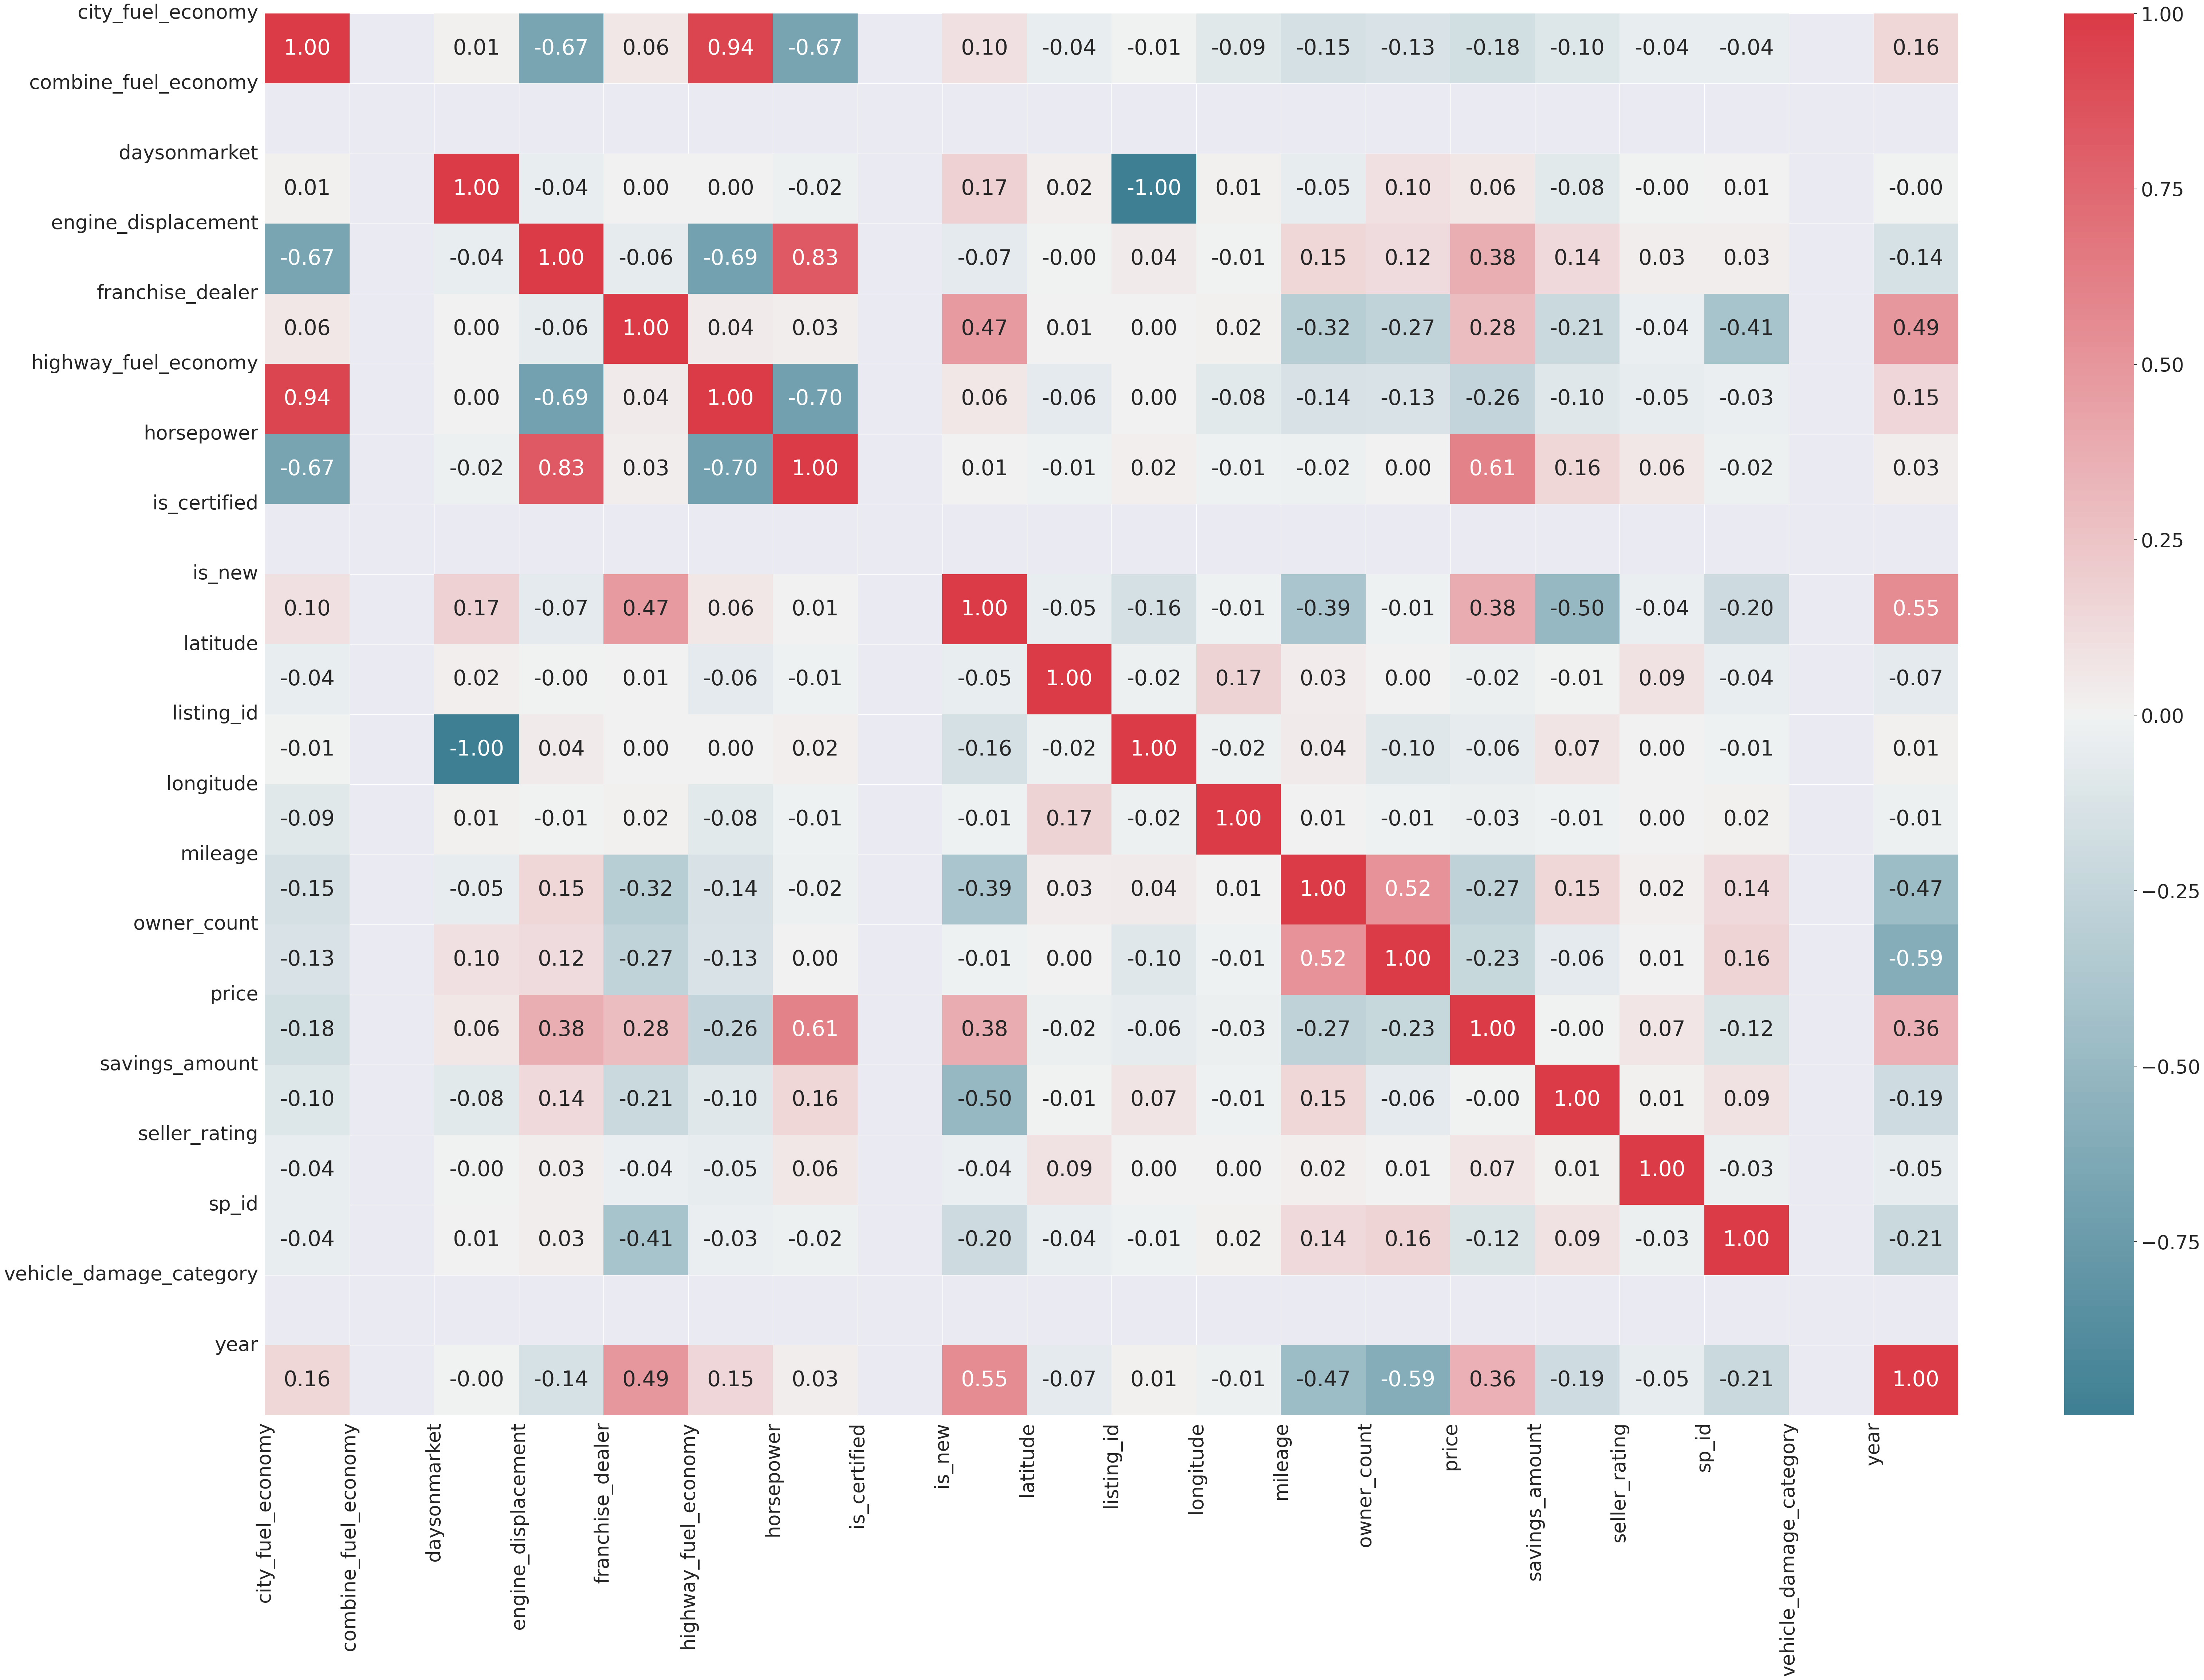

In [ ]:
#Adjust dataframe for sub analysis
df = bigdata
from sklearn import metrics
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

sns.set(font_scale=3.5)

def heatMap(df):
    #Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(75, 50))
    #Generate Color Map, red & blue
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()
heatMap(df) ## correlation between variables

<Axes: >

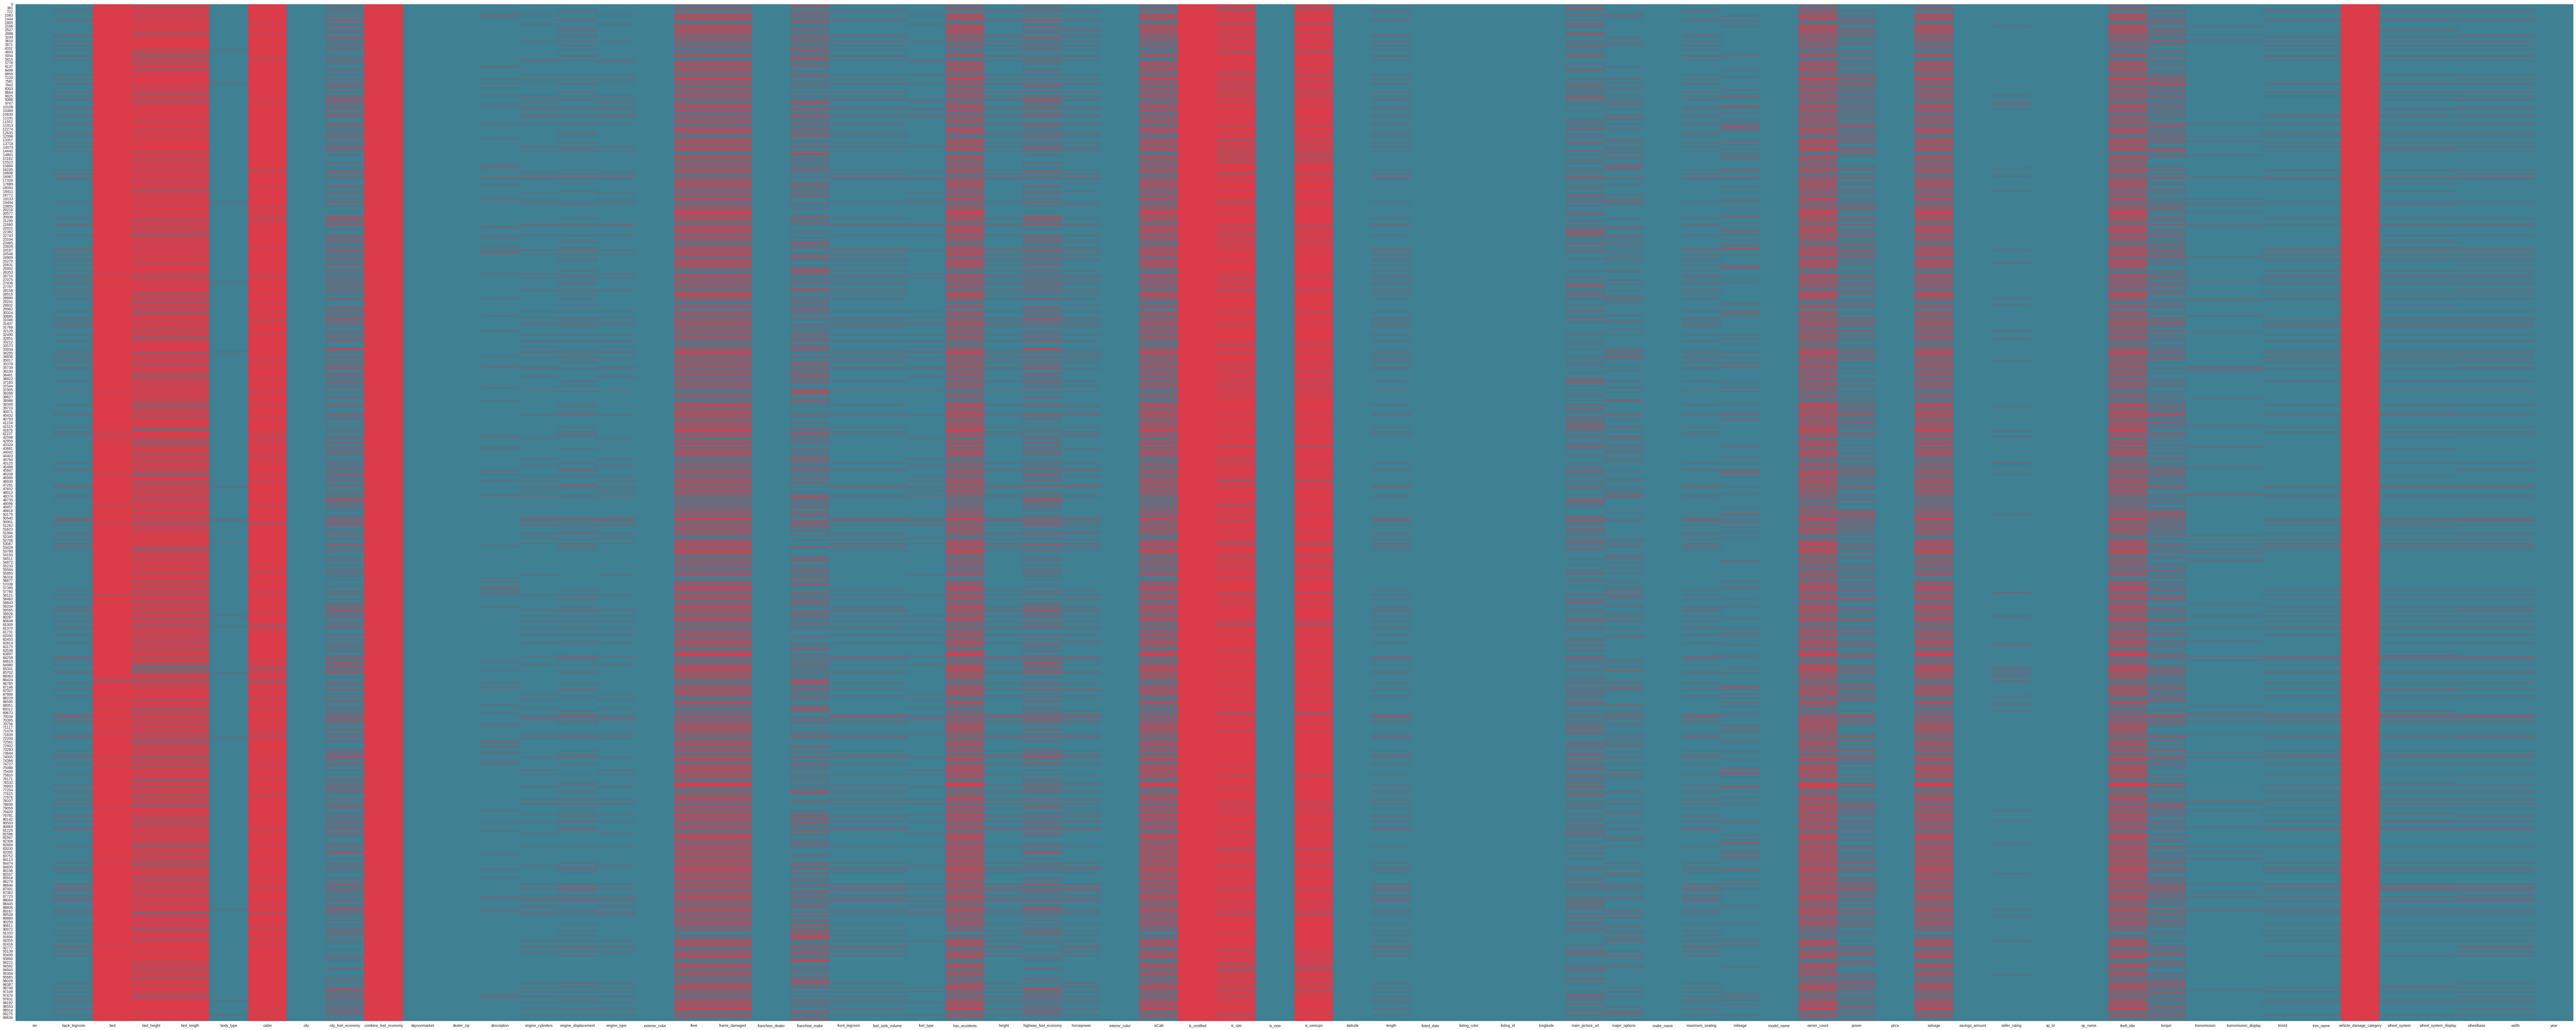

In [ ]:
#Missing Data Heat Map
df = dfrandom2
plt.figure(figsize=(125,50))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.isnull(), cbar = False, cmap = colormap)

We can see several features are deeply poorly populated and likely low quality, lets apply some vertical and horizontal cuts

In [ ]:
# Calculate the percentage of missing values in each column
missing_data = df.isnull().sum() / len(df) * 100

# Sort the resulting series in descending order
missing_data_sorted = missing_data.sort_values(ascending=False)

# Print the sorted series
print(missing_data_sorted)


vehicle_damage_category   100.00
combine_fuel_economy      100.00
is_certified              100.00
bed                        99.37
cabin                      97.92
                           ...  
franchise_dealer            0.00
dealer_zip                  0.00
daysonmarket                0.00
city                        0.00
year                        0.00
Length: 66, dtype: float64


In [ ]:
print(missing_data_sorted.head(25))


vehicle_damage_category   100.00
combine_fuel_economy      100.00
is_certified              100.00
bed                        99.37
cabin                      97.92
is_oemcpo                  95.52
is_cpo                     93.94
bed_height                 85.58
bed_length                 85.58
owner_count                50.55
fleet                      47.62
theft_title                47.62
isCab                      47.62
has_accidents              47.62
frame_damaged              47.62
salvage                    47.62
franchise_make             18.99
torque                     17.16
highway_fuel_economy       16.29
city_fuel_economy          16.29
power                      15.97
main_picture_url           12.19
major_options               6.71
engine_displacement         5.72
horsepower                  5.72
dtype: float64


In [ ]:
# Drop columns with more than 75% missing data
df = df.dropna(thresh=df.shape[0]*0.25, axis=1)
print(df.info()) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99983 entries, 0 to 99982
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vin                   99983 non-null  object 
 1   back_legroom          94729 non-null  object 
 2   body_type             99525 non-null  object 
 3   city                  99983 non-null  object 
 4   city_fuel_economy     83697 non-null  float64
 5   daysonmarket          99983 non-null  int64  
 6   dealer_zip            99983 non-null  object 
 7   description           97485 non-null  object 
 8   engine_cylinders      96675 non-null  object 
 9   engine_displacement   94267 non-null  float64
 10  engine_type           96675 non-null  object 
 11  exterior_color        99980 non-null  object 
 12  fleet                 52373 non-null  object 
 13  frame_damaged         52373 non-null  object 
 14  franchise_dealer      99983 non-null  bool   
 15  franchise_make     

In [ ]:
# Calculate the number of rows before dropping
num_rows_before = df.shape[0]

# Drop rows with more than 75% missing data
df = df.dropna(thresh=df.shape[1]*0.25)

# Calculate the number of rows after dropping
num_rows_after = df.shape[0]

# Calculate the percentage of dropped rows
percentage_dropped_rows = (num_rows_before - num_rows_after) / num_rows_before * 100

# Print the percentage of dropped rows
print(percentage_dropped_rows)


0.0


In [ ]:
plt.figure(figsize=(250,50))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.isnull(), cbar = False, cmap = colormap)

<Axes: >

In [ ]:
len(df)

99983

<ipython-input-13-03b072c75c8a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-13-03b072c75c8a>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


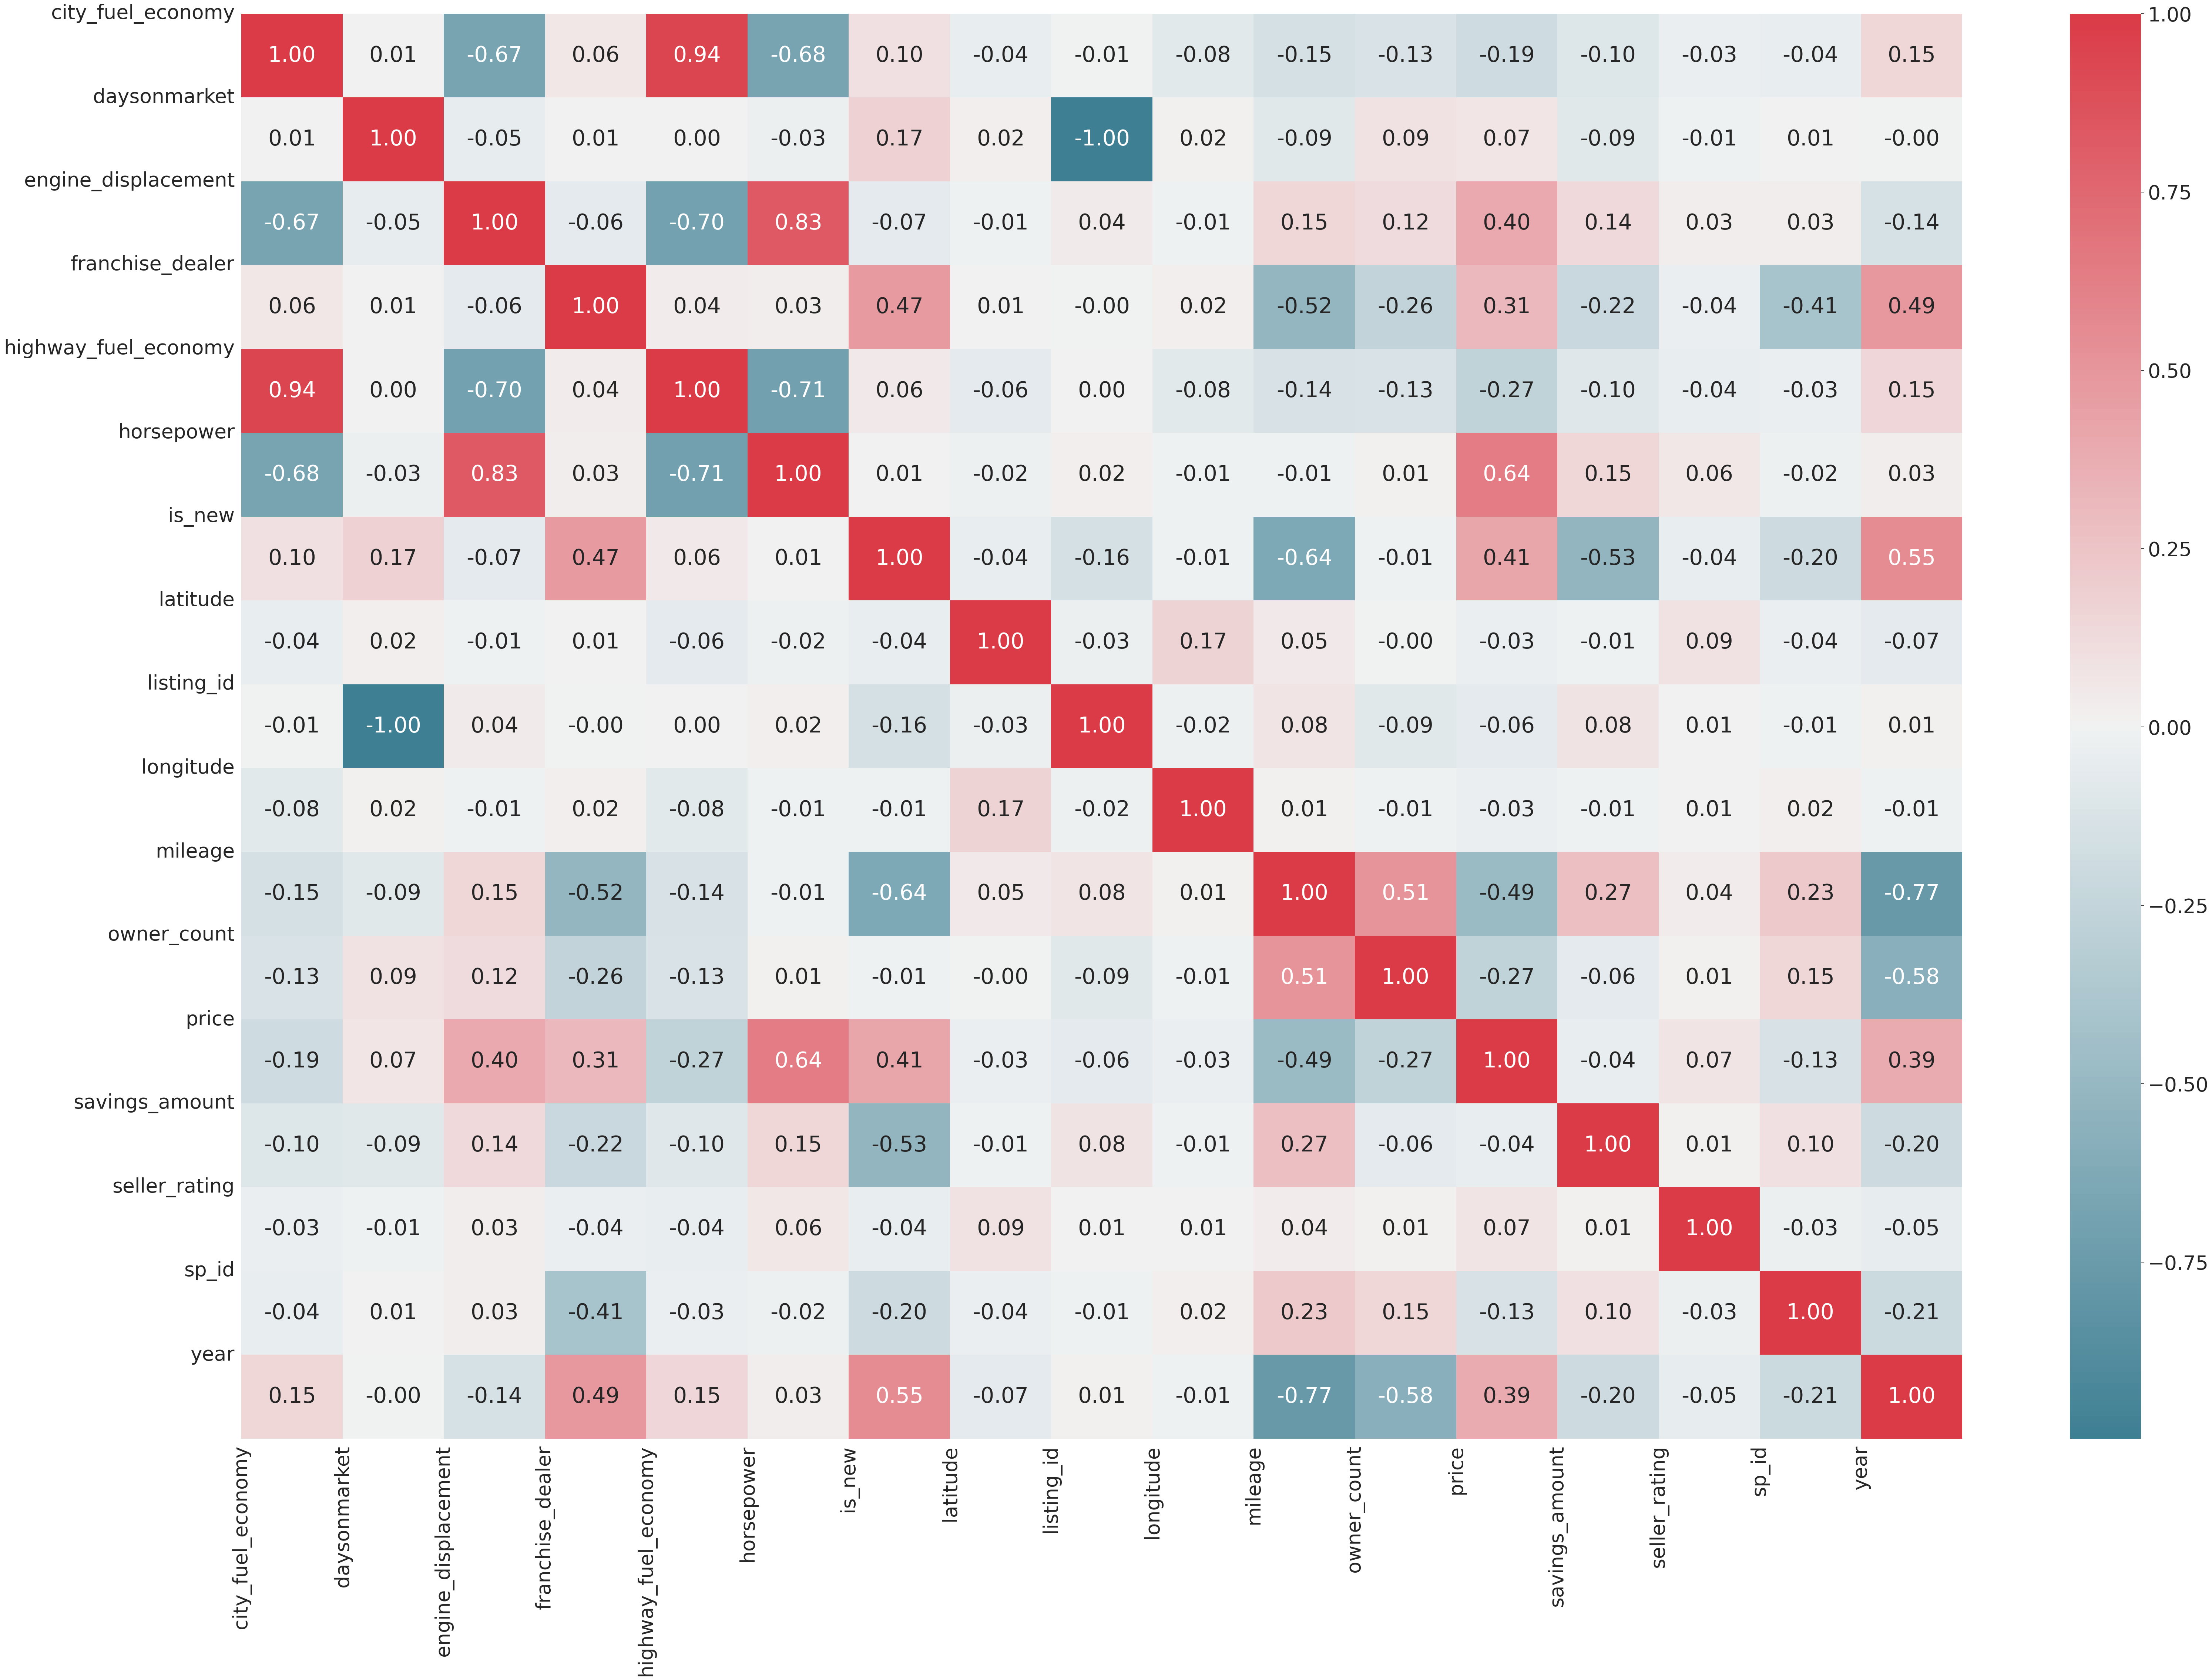

In [ ]:
%matplotlib inline
plt.style.use('seaborn')

sns.set(font_scale=3.5)

def heatMap(df):
    #Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(75, 50))
    #Generate Color Map, red & blue
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()
heatMap(df) ## correlation between variables

In [ ]:
data = df
corr = data.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))
corr = corr.mask(mask)
fig = ff.create_annotated_heatmap(
    z=corr.to_numpy().round(2),
    x=list(corr.index.values),
    y=list(corr.columns.values),       
    xgap=3, ygap=3,
    zmin=-1, zmax=1,
colorscale='RdBu',
    colorbar_thickness=30,
    colorbar_ticklen=3,
)
fig.update_layout(title_text='Correlation Matrix (impact relationship with numbers)',
                  title_x=0.5,
                  titlefont={'size': 20},
                  width=1200, height=1200,
                  xaxis_showgrid=False,
                  xaxis={'side': 'bottom'},
                  yaxis_showgrid=False,
                  yaxis_autorange='reversed',                   
                  paper_bgcolor=None,
                  template="simple_white"
                  )
fig.show()

<ipython-input-35-8abced6937cf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()
<ipython-input-35-8abced6937cf>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


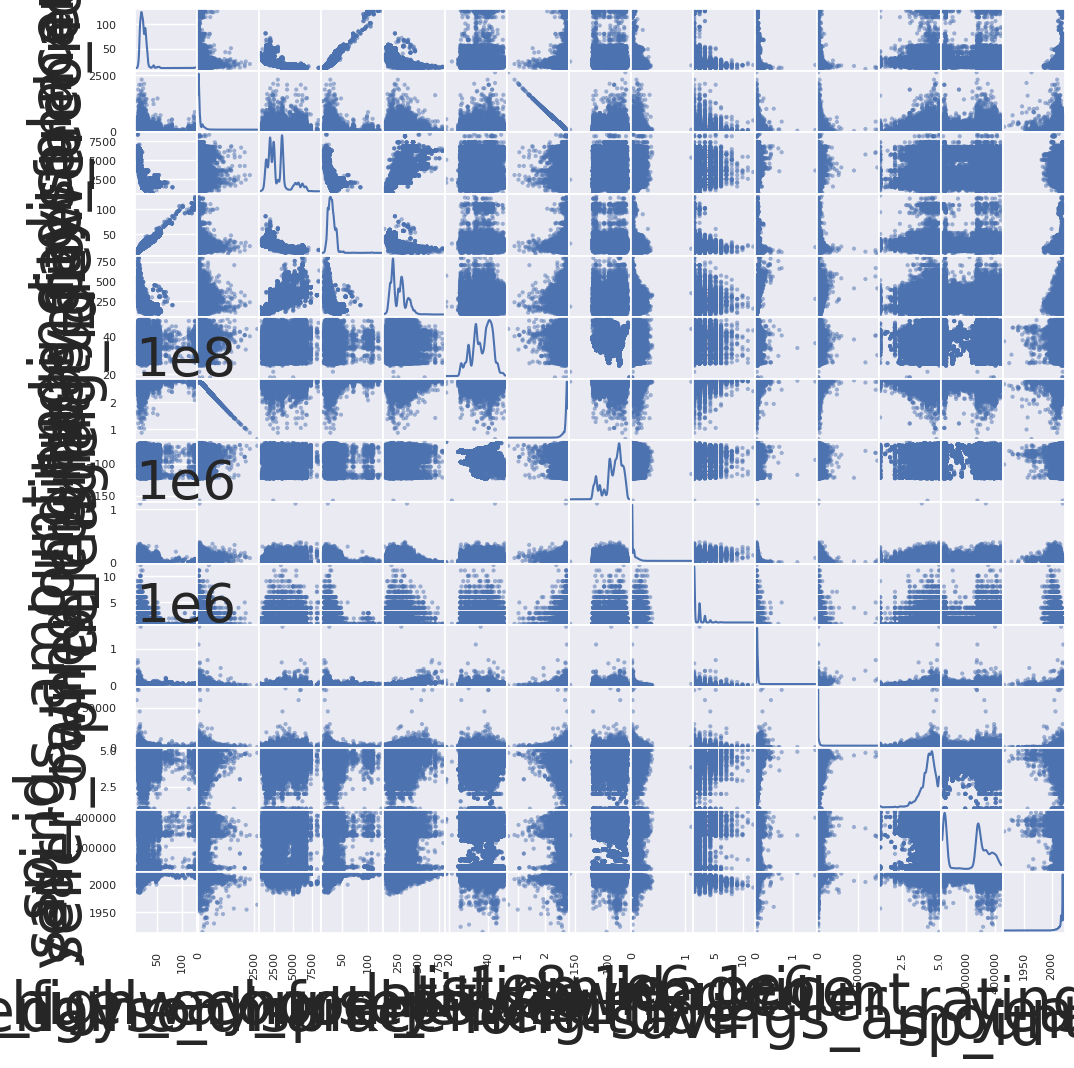

In [ ]:
#Only run later on
from pandas.plotting import scatter_matrix

# Subset DataFrame to include only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

scatter_matrix(numeric_cols, figsize=(12, 12), diagonal='kde')
plt.show()

Coefficients: 
 [[124.4818026]]
Mean squared error: 349002534.07
Coefficient of determination (R^2): 0.28


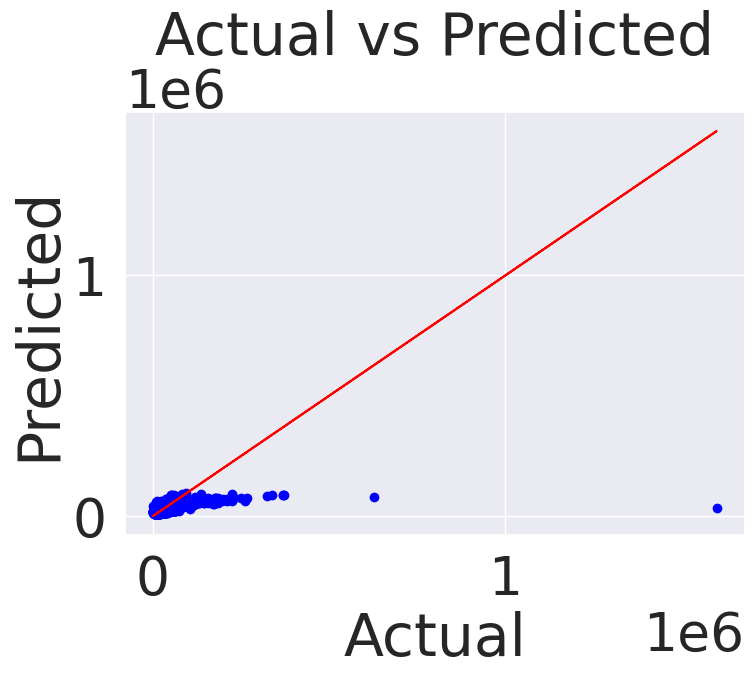

In [ ]:


# Ensure there's no missing data in 'year' and 'price' columns
df_clean = df[['horsepower', 'price']].dropna()

# Reshape the data to meet the requirements of the sklearn library
X = df_clean['horsepower'].values.reshape(-1,1)
y = df_clean['price'].values.reshape(-1,1)

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression object
model = LinearRegression()

# Train the model using the training set
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# The coefficients
print('Coefficients: \n', model.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))
import matplotlib.pyplot as plt

# Scatter plot of actual test vs predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red') # this is our line of perfect predictions

plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


Coefficients: 
 [[1651.03714837]]
Mean squared error: 346182595.59
Coefficient of determination (R^2): 0.11


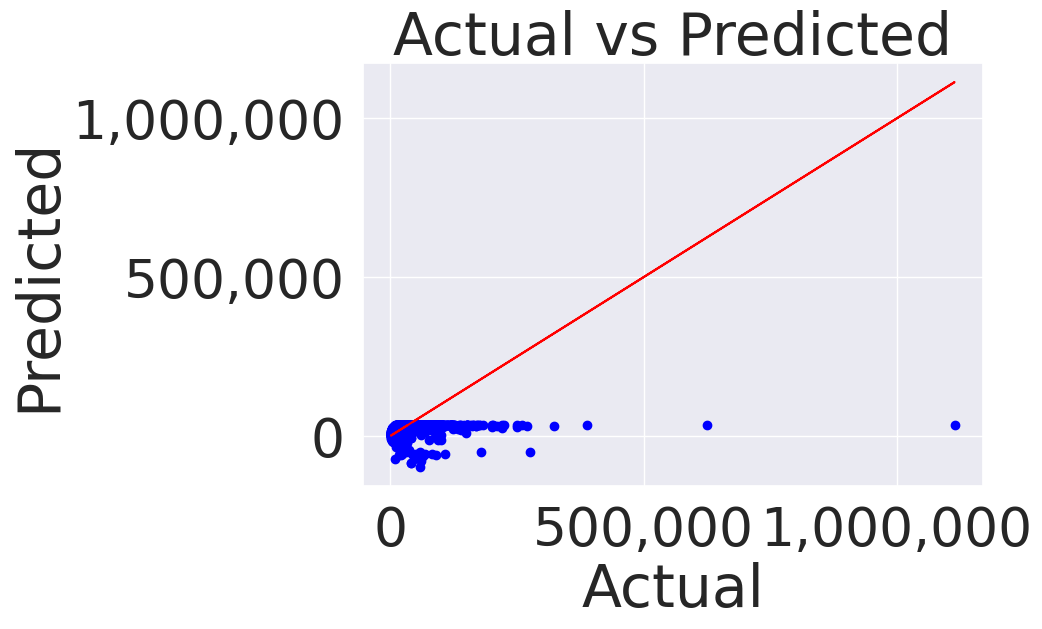

In [ ]:


# Ensure there's no missing data in 'year' and 'price' columns
df_clean = df[['year', 'price']].dropna()

# Reshape the data to meet the requirements of the sklearn library
X = df_clean['year'].values.reshape(-1,1)
y = df_clean['price'].values.reshape(-1,1)

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression object
model = LinearRegression()

# Train the model using the training set
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# The coefficients
print('Coefficients: \n', model.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Set global parameters to adjust font size
plt.rcParams.update({'font.size': 10})

# Scatter plot of actual test vs predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red') # this is our line of perfect predictions

plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Change the scientific notation to plain numbers on axes
ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.show()

<ipython-input-40-3f55db83146d>:5: RuntimeWarning:

invalid value encountered in log1p



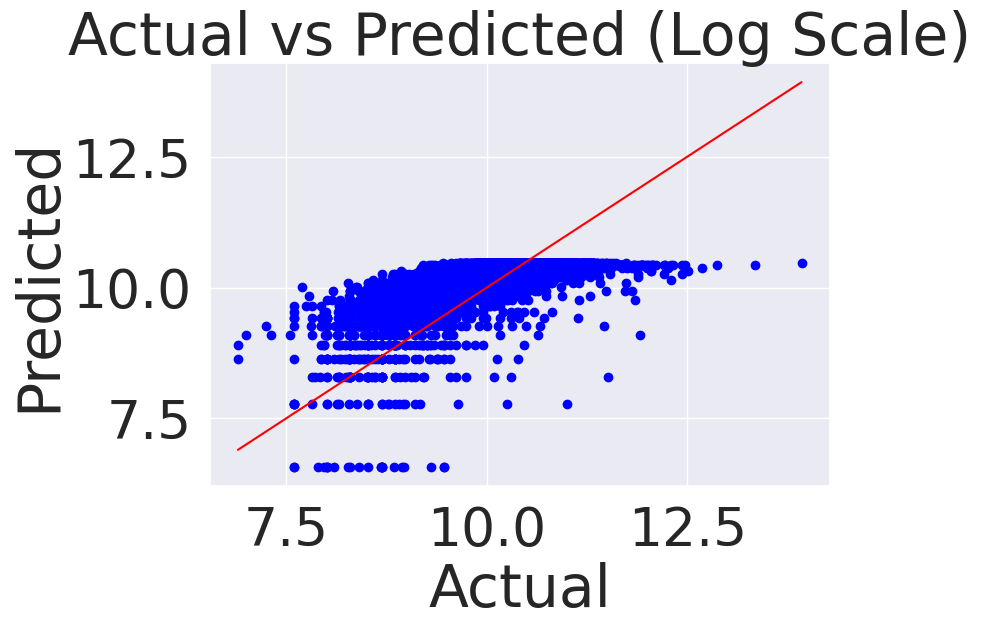

In [ ]:
import numpy as np

# Transform y_test and y_pred to log scale and filter out -inf values
y_test_log = np.log1p(y_test).reshape(-1)
y_pred_log = np.log1p(y_pred).reshape(-1)

# Scatter plot of actual test vs predicted values on log scale
plt.scatter(y_test_log, y_pred_log, color='blue')
plt.plot([min(y_test_log), max(y_test_log)], [min(y_test_log), max(y_test_log)], color='red') # this is our line of perfect predictions

plt.title('Actual vs Predicted (Log Scale)')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.rcParams.update({'font.size': 10}) # decrease font size

# Show the plot
plt.show()


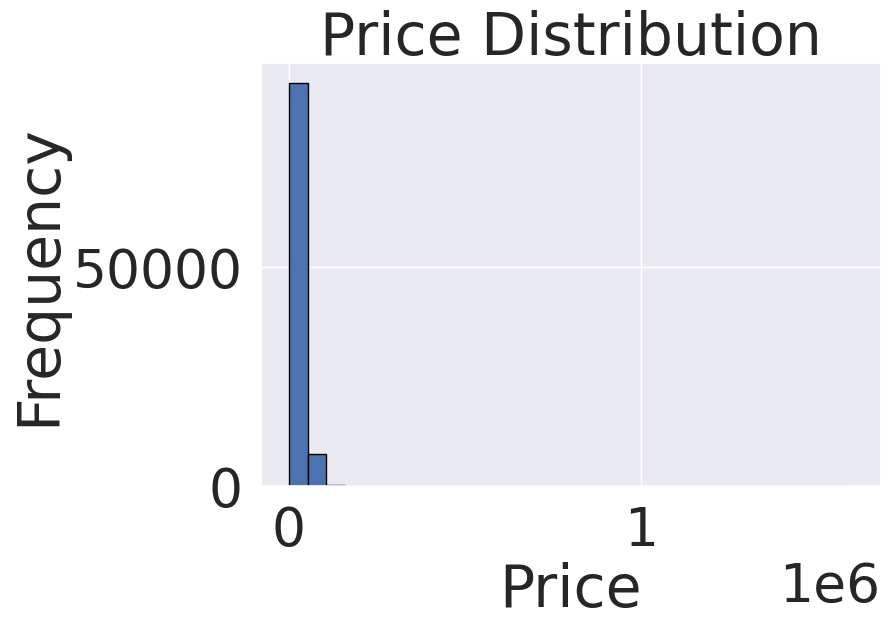

In [ ]:
import matplotlib.pyplot as plt

# Ensure there's no missing data in 'price' column
prices = df['price'].dropna()

plt.hist(prices, bins=30, edgecolor='black')  # You can adjust the number of bins

plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()


In [ ]:
df.describe()

city_fuel_economy  daysonmarket  engine_displacement  \
count       83602.000000  99980.000000         94211.000000   
mean           22.673453     75.955411          2975.411576   
std             8.821339    108.773426          1348.958921   
min             8.000000      0.000000           700.000000   
25%            18.000000     14.000000          2000.000000   
50%            21.000000     36.000000          2500.000000   
75%            26.000000     82.000000          3600.000000   
max           127.000000   2624.000000          8400.000000   

       highway_fuel_economy    horsepower      latitude    listing_id  \
count          83602.000000  94211.000000  99980.000000  9.998000e+04   
mean              29.453829    248.560487     36.981354  2.755079e+08   
std                7.783895     90.541840      4.996440  8.881488e+06   
min               11.000000     70.000000     18.398800  6.370620e+07   
25%               25.000000    175.000000     33.508300  2.746096e+08   
50%               29.000000    245.000000     37.862100  2.785409e+08   
75%               33.000000    301.000000     40.981700  2.804528e+08   
max              127.000000    808.000000     48.923700  2.819955e+08   

          longitude       mileage   owner_count         price  savings_amount  \
count  99980.000000  9.515500e+04  49466.000000  9.998000e+04    99980.000000   
mean     -90.622433  3.141453e+04      1.536267  2.993698e+04      554.730056   
std       13.894424  4.576373e+04      0.923753  1.945660e+04     1122.528729   
min     -157.902000  0.000000e+00      1.000000  2.500000e+02        0.000000   
25%      -97.085100  6.000000e+00      1.000000  1.837100e+04        0.000000   
50%      -87.258100  8.389000e+03      1.000000  2.652600e+04        0.000000   
75%      -80.366700  4.425950e+04      2.000000  3.829325e+04      787.000000   
max      -66.078500  1.111111e+06     12.000000  1.599500e+06    74595.000000   

       seller_rating          sp_id          year  
count   98561.000000   99977.000000  99980.000000  
mean        4.269467  233436.678516   2017.708472  
std         0.514788  132370.729391      4.218381  
min         1.000000   41593.000000   1915.000000  
25%         4.000000   63254.000000   2017.000000  
50%         4.333333  281587.000000   2020.000000  
75%         4.607143  336775.000000   2020.000000  
max         5.000000  440734.000000   2021.000000

In [ ]:
# Import necessary libraries
import pandas as pd

# Adjust pandas display settings

# Sort dataframe by 'price' in descending order
df_sorted = df.sort_values(by='price', ascending=False)

# Display the top 100 most expensive cars
top_100_expensive_cars = df_sorted.head(100)
print(top_100_expensive_cars)

                     vin back_legroom    body_type              city  \
70792  2C4RDGEGXHR681294      36.5 in      Minivan        Springdale   
95312  W1KZF8DB9MA874742           --        Sedan    Foothill Ranch   
62060  ZFF70RCA0B0175165           --        Coupe        Marysville   
8866   2FAGP9DW3LH100113           --        Coupe  Saratoga Springs   
78643  ZHWUM6ZD0LLA09342           --        Coupe       San Antonio   
...                  ...          ...          ...               ...   
25579  W1KUX8GB0LA558390        40 in        Sedan         Arlington   
16454  WDDUG8JB4LA523506      34.1 in        Sedan        Barrington   
67878  WP0JB0937GS050341           --        Coupe         Saint Ann   
20956  0000008R02C147159          NaN        Coupe         Cleveland   
67876            1E15634          NaN  Convertible         Saint Ann   

       city_fuel_economy  daysonmarket dealer_zip  \
70792              17.00            46      72764   
95312                NaN     

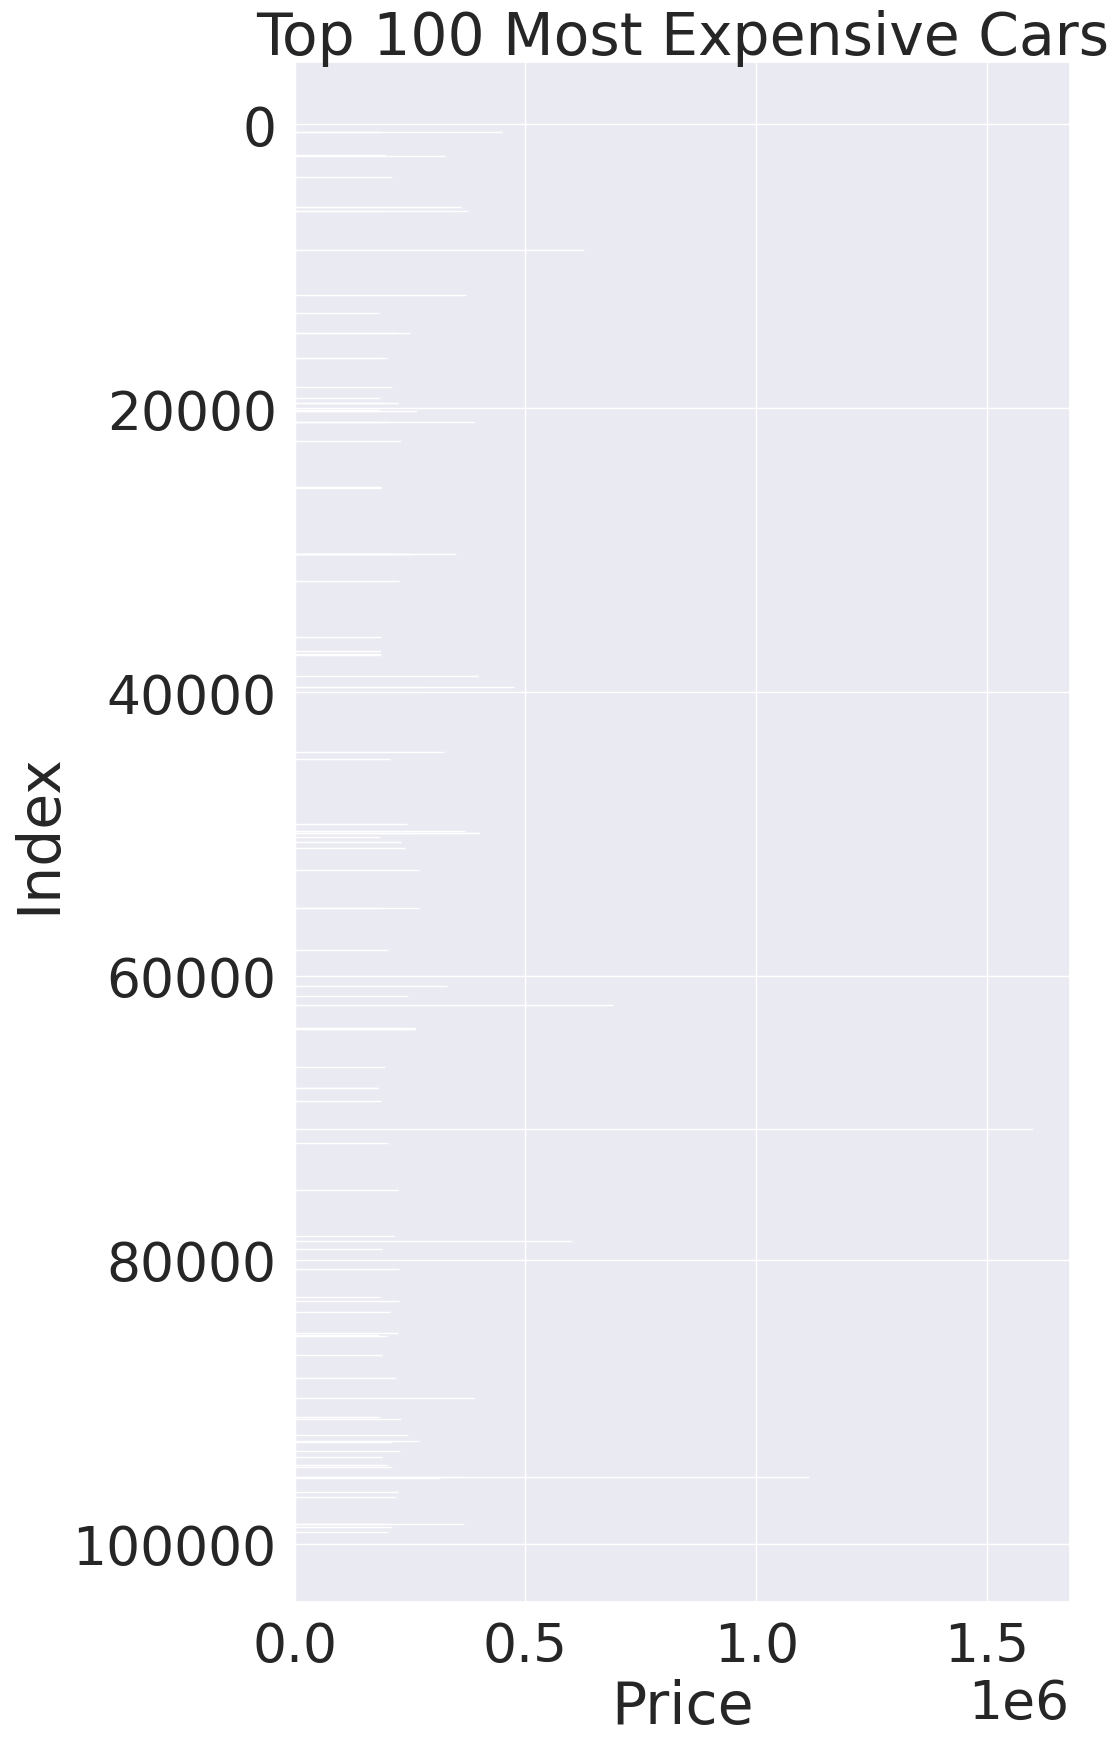

In [ ]:
import matplotlib.pyplot as plt

# First sort the dataframe by 'price'
df_sorted = df.sort_values(by='price', ascending=False)

# Then get the top 100 most expensive cars
top_100_expensive_cars = df_sorted.head(100)

# Create the bar plot
plt.figure(figsize=(10, 20))  # Adjust this to fit your needs
plt.barh(top_100_expensive_cars.index, top_100_expensive_cars['price'])
plt.xlabel('Price')
plt.ylabel('Index')
plt.title('Top 100 Most Expensive Cars')
plt.gca().invert_yaxis()  # Reverse the order of cars to have the most expensive at the top
plt.show()


In [ ]:
df_sorted.head()

vin back_legroom body_type              city  \
70792  2C4RDGEGXHR681294      36.5 in   Minivan        Springdale   
95312  W1KZF8DB9MA874742           --     Sedan    Foothill Ranch   
62060  ZFF70RCA0B0175165           --     Coupe        Marysville   
8866   2FAGP9DW3LH100113           --     Coupe  Saratoga Springs   
78643  ZHWUM6ZD0LLA09342           --     Coupe       San Antonio   

       city_fuel_economy  daysonmarket dealer_zip  \
70792              17.00            46      72764   
95312                NaN            15      92610   
62060              11.00           419      43040   
8866               12.00            71      12866   
78643               9.00            65      78257   

                                             description  \
70792  ****  Online financing go to (taylorautosalesa...   
95312  Mercedes-Benz of Foothill Ranch is offering yo...   
62060  2011 Ferrari 599 GTO. Rossa Corsa with a Nero ...   
8866                                                 NaN   
78643  Recent Arrival! 59 Original Miles! MSRP- $607,...   

           engine_cylinders  engine_displacement           engine_type  \
70792  V6 Flex Fuel Vehicle              3600.00  V6 Flex Fuel Vehicle   
95312                    I4                  NaN                    I4   
62060                   V12              6000.00                   V12   
8866                     V6              3500.00                    V6   
78643                   V12              6500.00                   V12   

             exterior_color  fleet frame_damaged  franchise_dealer  \
70792                 Black   True         False             False   
95312           Polar White    NaN           NaN              True   
62060                   Red  False         False             False   
8866                  Black    NaN           NaN              True   
78643  Arancio Argos- Pearl  False         False              True   

      franchise_make front_legroom fuel_tank_volume          fuel_type  \
70792            NaN       40.7 in           20 gal  Flex Fuel Vehicle   
95312  Mercedes-Benz            --               --           Gasoline   
62060            NaN       44.7 in         27.7 gal           Gasoline   
8866            Ford         43 in         15.2 gal           Gasoline   
78643        Ferrari            --               --           Gasoline   

      has_accidents   height  highway_fuel_economy  horsepower  \
70792         False  68.9 in                 25.00      283.00   
95312           NaN       --                   NaN         NaN   
62060         False  52.2 in                 15.00      670.00   
8866            NaN  43.7 in                 18.00      660.00   
78643         False  44.7 in                 15.00      759.00   

              interior_color  isCab  is_new  latitude    length listed_date  \
70792                  Black   True   False     36.20  202.8 in  2020-07-27   
95312  Neva White/Magma Grey    NaN    True     33.68        --  2020-08-28   
62060                  Black  False   False     40.24  185.4 in  2019-07-20   
8866                    None    NaN    True     43.10  187.5 in  2020-06-30   
78643            Nero Cosmus  False   False     29.58  194.6 in  2020-07-08   

      listing_color  listing_id  longitude  \
70792         BLACK   277680751     -94.14   
95312         WHITE   280520858    -117.66   
62060           RED   246843793     -83.34   
8866          BLACK   275364132     -73.75   
78643       UNKNOWN   276053028     -98.60   

                                        main_picture_url  \
70792  https://static.cargurus.com/images/forsale/202...   
95312                                                NaN   
62060  https://static.cargurus.com/images/forsale/202...   
8866                                                 NaN   
78643  https://static.cargurus.com/images/forsale/202...   

                                           major_options      make_name  \
70792  ['Leather Seats', 'Navi

In [ ]:
df = df_sorted[df_sorted['price'] <= 1_000_000]


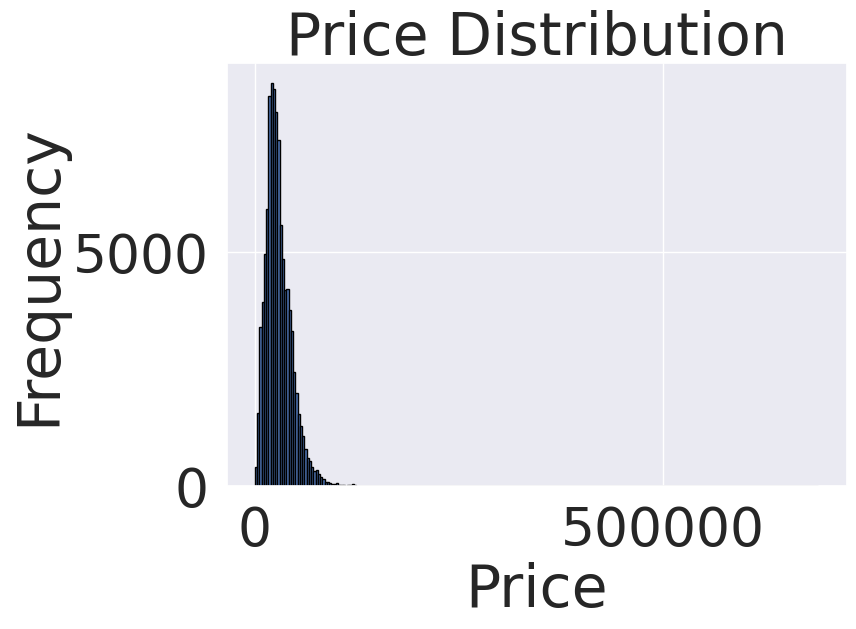

In [ ]:
# Ensure there's no missing data in 'price' column
prices = df['price'].dropna()

plt.hist(prices, bins=250, edgecolor='black')  # You can adjust the number of bins

plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()


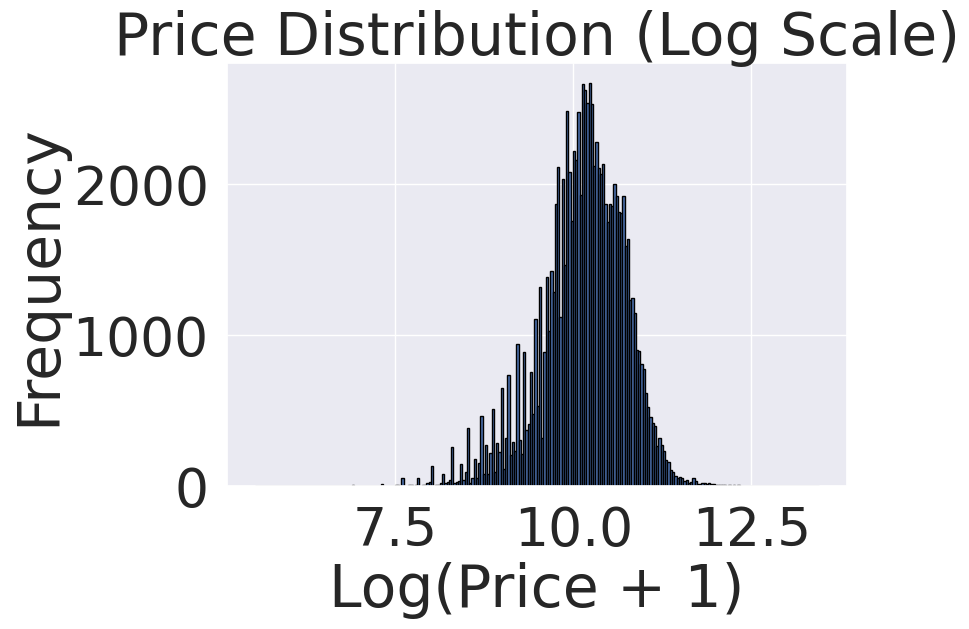

In [ ]:
import numpy as np

# Take the log of prices, add a small constant to avoid taking log of zero
log_prices = np.log1p(prices)

plt.hist(log_prices, bins=250, edgecolor='black')  

plt.title('Price Distribution (Log Scale)')
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')

plt.show()

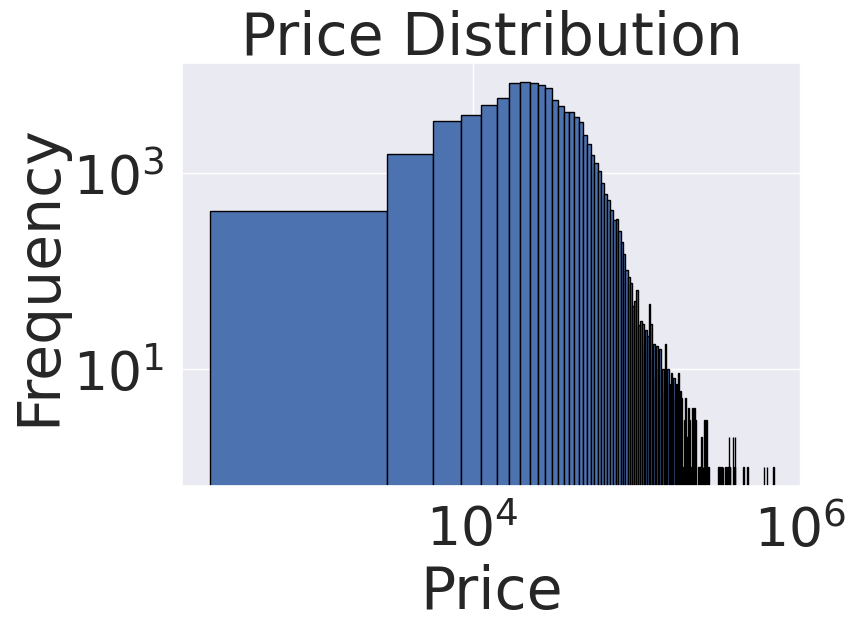

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming prices is a Series or a DataFrame column
plt.hist(df['price'], bins=250, edgecolor='black', log=True)

plt.xscale('log') # set the scale of the x-axis to log

plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()


In [ ]:
# Drop missing values
df_clean = df.dropna()

# Select only numerical columns for regression
df_numeric = df_clean.select_dtypes(include=np.number)

# Define target and features
target = 'price'
features = df_numeric.columns.drop(target)

X = df_numeric[features]
y = df_numeric[target]


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict the target variable
y_pred = model.predict(X_test)


Mean Squared Error: 55683850.899243094
Root Mean Squared Error: 7462.161275343967
Coefficient of determination (R^2): 0.66


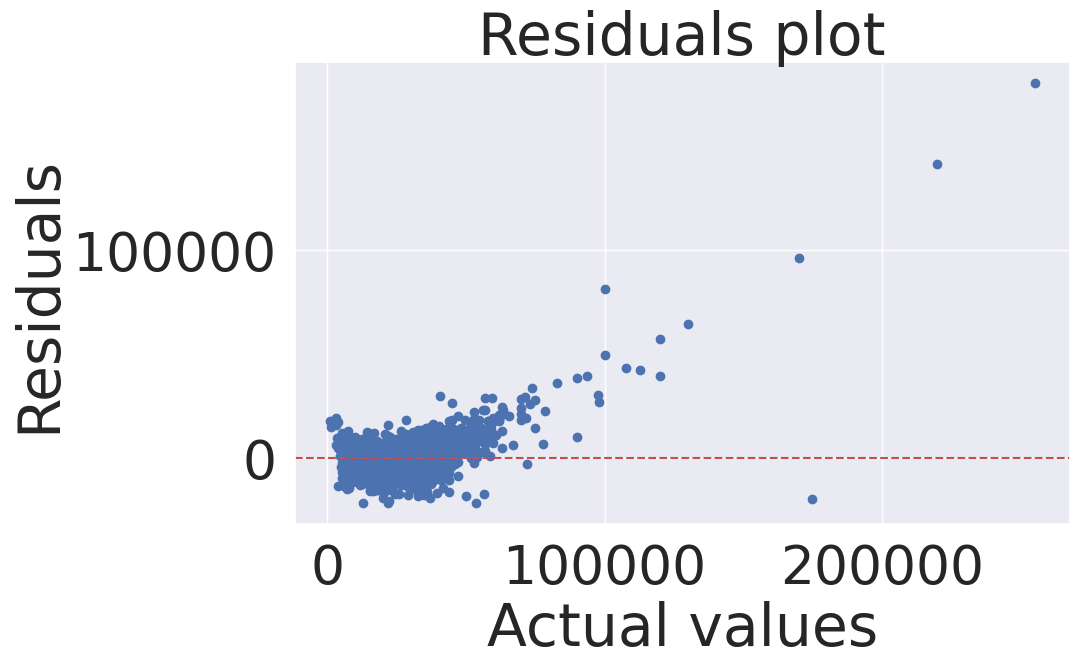

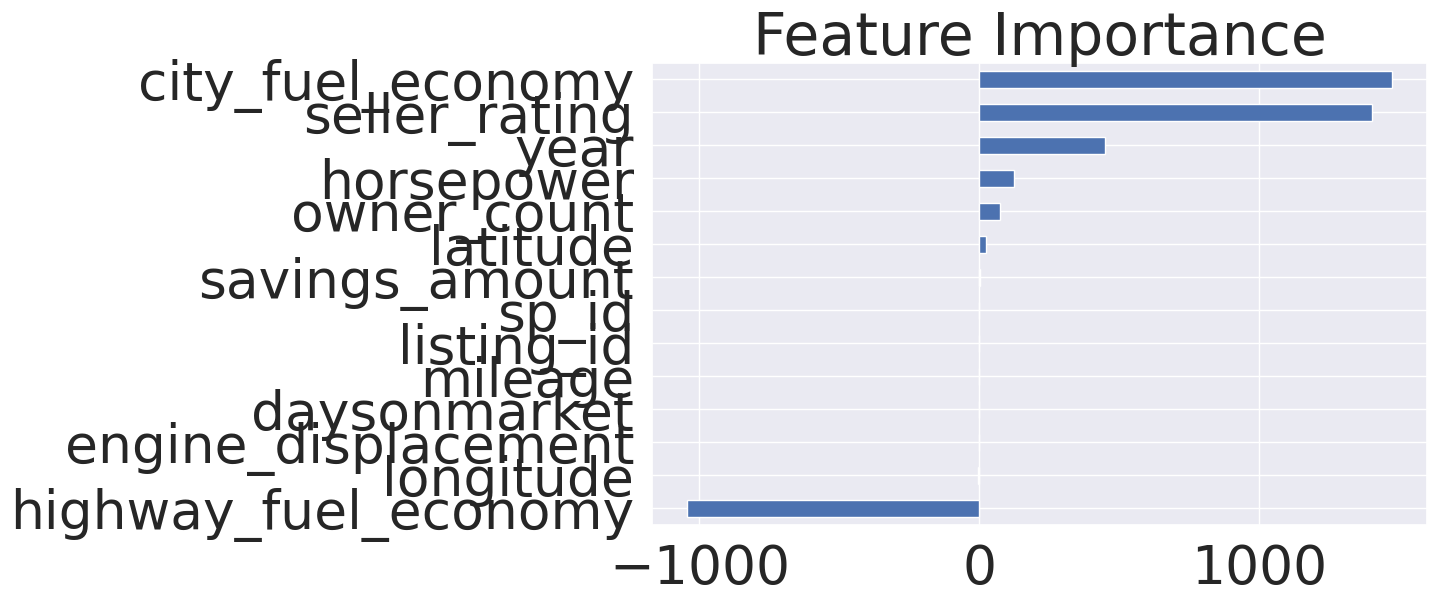

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.inspection import permutation_importance

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.title('Residuals plot')
plt.xlabel('Actual values')
plt.ylabel('Residuals')
plt.axhline(0, color='r', linestyle='--')
plt.show()

# Calculate feature importance
importances = model.coef_
feature_importances = pd.Series(importances, index=X.columns)

# Plot feature importance
feature_importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importance')
plt.show()


#XGBOOST WITH RANDOM SEARCH

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define predictors and target
X = df.drop('price', axis=1)
y = df['price']

# Select categorical columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns

# One-hot encode categorical columns
transformer = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X = transformer.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# XGBoost model
xgb = XGBRegressor(n_jobs=-1)

# Hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7],
    'colsample_bytree': [0.5, 0.7, 0.9, 1],
    'gamma': [0, 0.25, 0.5, 1.0],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(xgb, param_distributions=param_grid, n_iter=50, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, verbose=3)
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=100, n_jobs=-1,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 0.9, 1],
                                        'gamma': [0, 0.25, 0.5, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1]},
                   scoring='neg_mean_squared_error', verbose=3)

Mean Squared Error: 22578012.157430273
Root Mean Squared Error: 4751.632578117786


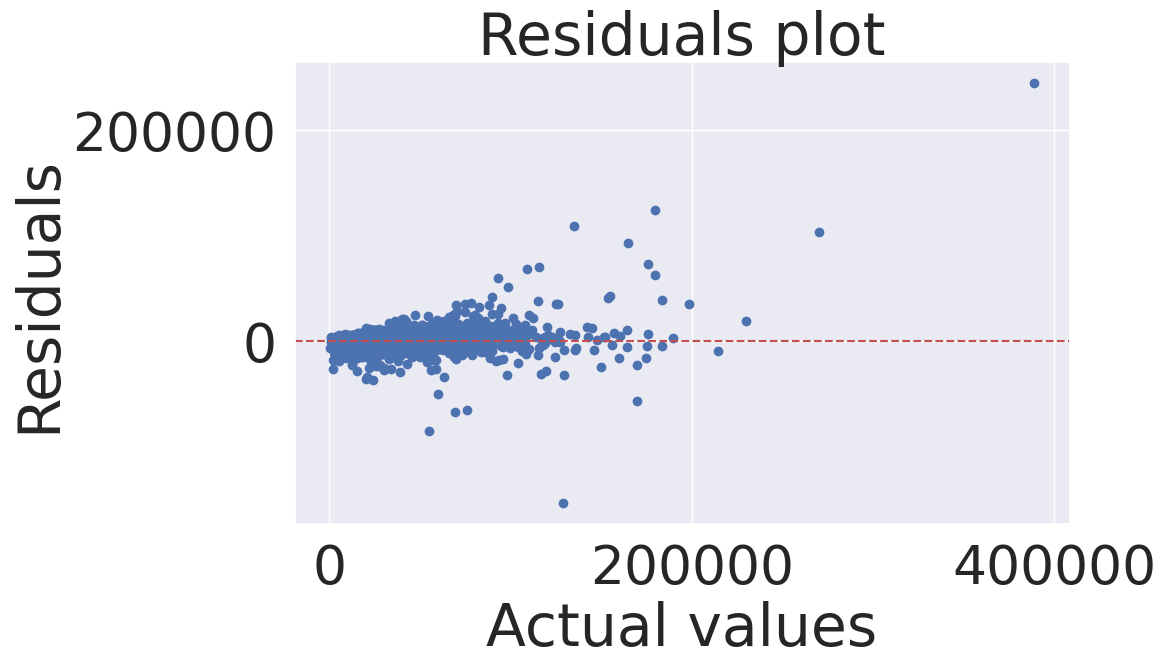

In [ ]:
# Make predictions
y_pred = random_search.predict(X_test)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.title('Residuals plot')
plt.xlabel('Actual values')
plt.ylabel('Residuals')
plt.axhline(0, color='r', linestyle='--')
plt.show()


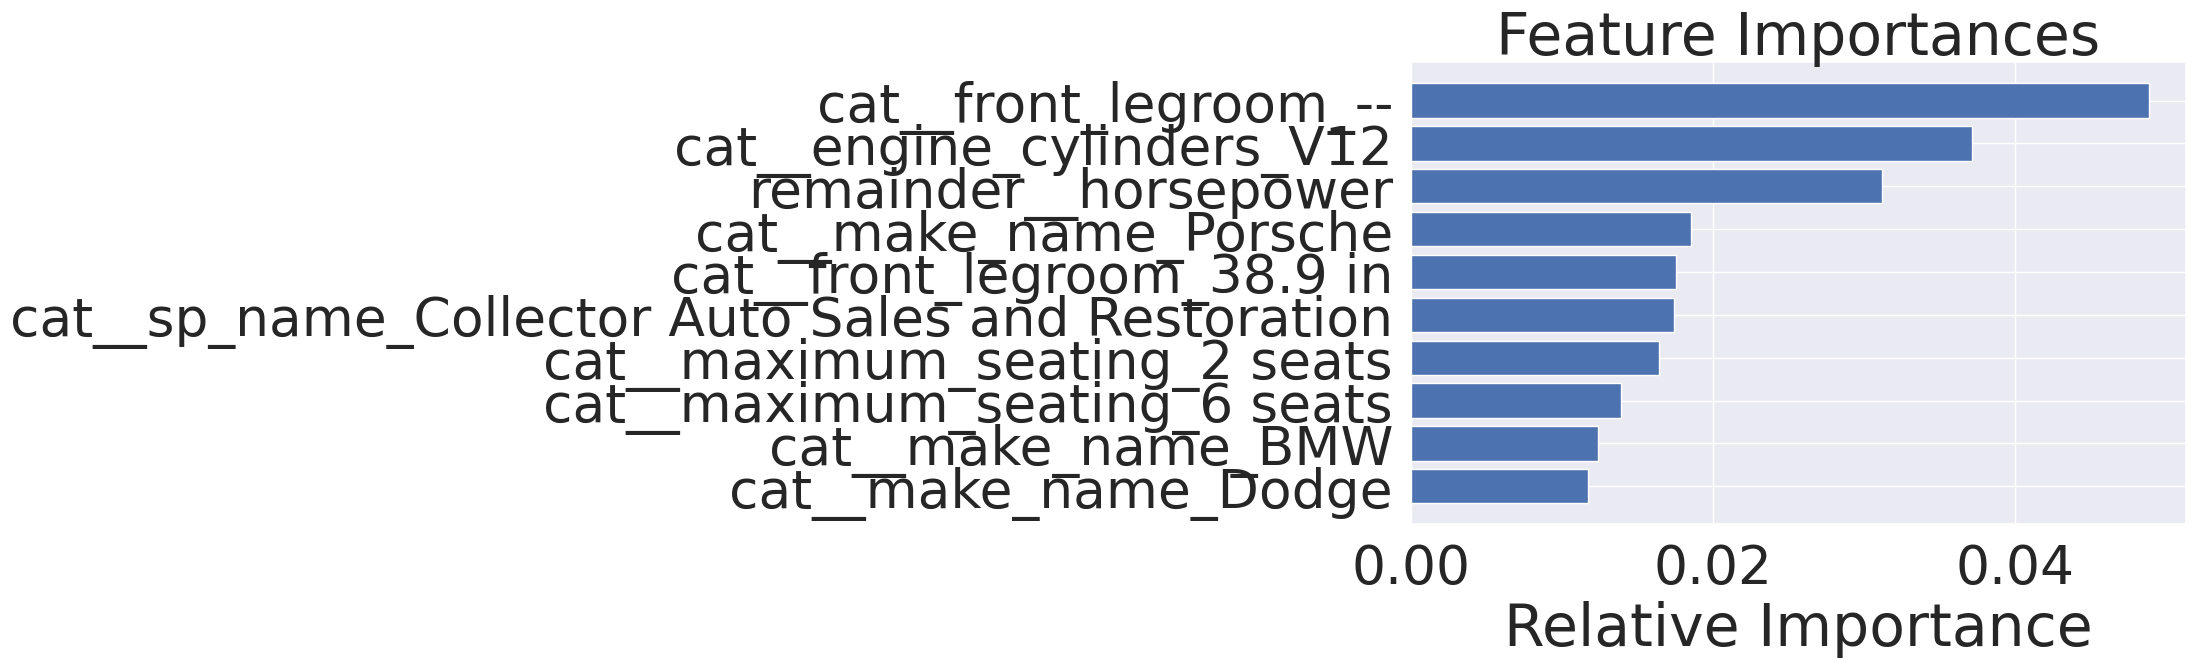

In [ ]:
# Plot feature importance
xgb = random_search.best_estimator_
importances = xgb.feature_importances_
feature_names = transformer.get_feature_names_out()

# Get the importance of the top 10 features
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


GPU Optimized XGBOOST

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# XGBoost model
xgb = XGBRegressor(n_jobs=-1, tree_method='gpu_hist')

# Hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200, 500,1000],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 10, 25, 50],
    'colsample_bytree': [0.5, 0.7, 0.9, 1],
    'gamma': [0, 0.25, 0.5, 1.0],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'tree_method': ['gpu_hist']  # Ensure that the GPU is used during the randomized search
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(xgb, param_distributions=param_grid, n_iter=100, 
                                   scoring='neg_mean_absolute_error', n_jobs=-1, 
                                   cv=10, verbose=10, random_state=1001)

# Now fit the model
random_search.fit(X, y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


Streaming output truncated to the last 5000 lines.
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1025, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [20:57:41] ../src/tree/updater_gpu_hist.cu:802: Exception in gpu_hist: [20:57:41] ../src/c_api/../data/../common/device_helpers.cuh:431: Memory allocation error on worker 0: std::bad_alloc: cudaErrorMemoryAllocation: out of memory
- Free memory: 734855168
- Requested memory: 107374182

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate...
                                          predictor=None, random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 0.9, 1],
                                        'gamma': [0, 0.25, 0.5, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 10, 25,
                                                      50],
                                        'n_estimators': [50, 100, 200, 500,
                                                         1000],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1],
                                        'tree_method': ['gpu_hist']},
                   random_state=1001, scoring='neg_mean_absolute_error',
                   verbose=10)

Mean Squared Error: 8030519.877001487
Root Mean Squared Error: 2833.8171918812063


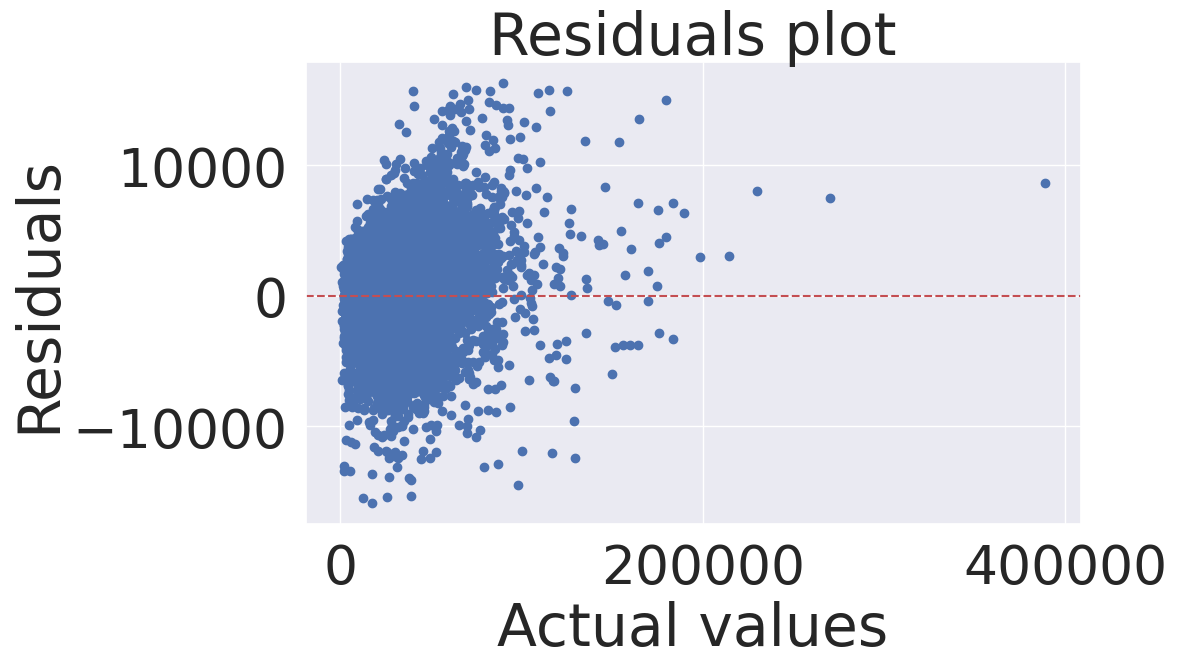

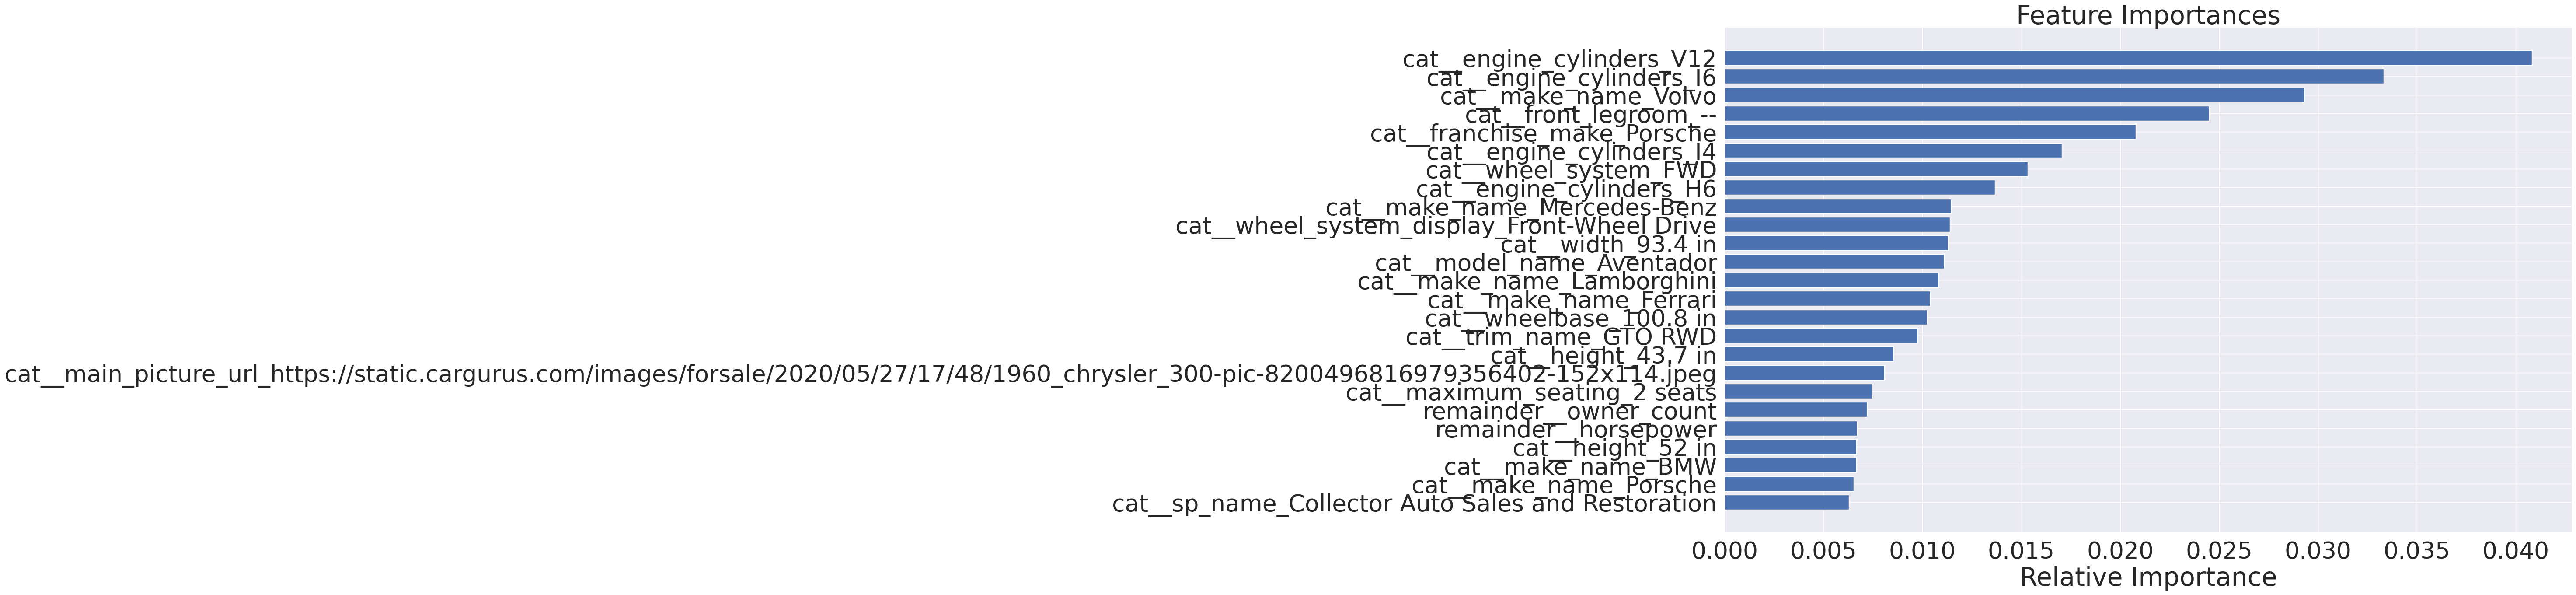

In [ ]:
# Make predictions
y_pred = random_search.predict(X_test)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.title('Residuals plot')
plt.xlabel('Actual values')
plt.ylabel('Residuals')
plt.axhline(0, color='r', linestyle='--')
plt.show()

# Plot feature importance
xgb = random_search.best_estimator_
importances = xgb.feature_importances_
feature_names = transformer.get_feature_names_out()

# Get the importance of the top 10 features
indices = np.argsort(importances)[-25:]

plt.figure(figsize=(25, 15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [ ]:
df.head()

vin back_legroom body_type              city  \
62060  ZFF70RCA0B0175165           --     Coupe        Marysville   
8866   2FAGP9DW3LH100113           --     Coupe  Saratoga Springs   
78643  ZHWUM6ZD0LLA09342           --     Coupe       San Antonio   
39612         8403141452          NaN     Sedan            Wausau   
562    SCA687S57JU104572      43.5 in     Sedan          New York   

       city_fuel_economy  daysonmarket dealer_zip  \
62060              11.00           419      43040   
8866               12.00            71      12866   
78643               9.00            65      78257   
39612                NaN           998      54401   
562                12.00            54      10019   

                                             description engine_cylinders  \
62060  2011 Ferrari 599 GTO. Rossa Corsa with a Nero ...              V12   
8866                                                 NaN               V6   
78643  Recent Arrival! 59 Original Miles! MSRP- $607,...              V12   
39612  1 of 9 300F Specials built in 1960. The only o...              NaN   
562    This 2018 Rolls-Royce Phantom is proudly offer...              V12   

       engine_displacement engine_type        exterior_color  fleet  \
62060              6000.00         V12                   Red  False   
8866               3500.00          V6                 Black    NaN   
78643              6500.00         V12  Arancio Argos- Pearl  False   
39612                  NaN         NaN                 Black  False   
562                6800.00         V12        Infinity Black  False   

      frame_damaged  franchise_dealer franchise_make front_legroom  \
62060         False             False            NaN       44.7 in   
8866            NaN              True           Ford         43 in   
78643         False              True        Ferrari            --   
39612         False             False            NaN           NaN   
562           False              True    Rolls-Royce         41 in   

      fuel_tank_volume fuel_type has_accidents   height  highway_fuel_economy  \
62060         27.7 gal  Gasoline         False  52.2 in                 15.00   
8866          15.2 gal  Gasoline           NaN  43.7 in                 18.00   
78643               --  Gasoline         False  44.7 in                 15.00   
39612              NaN       NaN         False      NaN                   NaN   
562           23.8 gal  Gasoline         False  64.8 in                 19.00   

       horsepower interior_color  isCab  is_new  latitude    length  \
62060      670.00          Black  False   False     40.24  185.4 in   
8866       660.00           None    NaN    True     43.10  187.5 in   
78643      759.00    Nero Cosmus  False   False     29.58  194.6 in   
39612         NaN    Brown (Tan)  False   False     44.98       NaN   
562        563.00          Black  False   False     40.77  227.2 in   

      listed_date listing_color  listing_id  longitude  \
62060  2019-07-20           RED   246843793     -83.34   
8866   2020-06-30         BLACK   275364132     -73.75   
78643  2020-07-08       UNKNOWN   276053028     -98.60   
39612  2017-12-17         BLACK   194192422     -89.65   
562    2020-07-17         BLACK   276817189     -73.99   

                                        main_picture_url  \
62060  https://static.cargurus.com/images/forsale/202...   
8866                                                 NaN   
78643  https://static.cargurus.com/images/forsale/202...   
39612  https://static.cargurus.com/images/forsale/202...   
562    https://static.cargurus.com/images/forsale/202...   

                                           major_options    make_name  \
62060                  ['Leather Seats', 'Alloy Wheels']      Ferrari   
8866                                                 NaN         Ford   
78643                                                NaN  Lamborghini   
39612                                                NaN    